Import Library

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

Data Preprocessing

In [2]:
data = pd.read_csv("co2.csv")
data.head()

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [3]:
data.dtypes

time     object
co2     float64
dtype: object

In [4]:
data['time'] = pd.to_datetime(data['time'] , dayfirst=False)
data.dtypes

time    datetime64[ns]
co2            float64
dtype: object

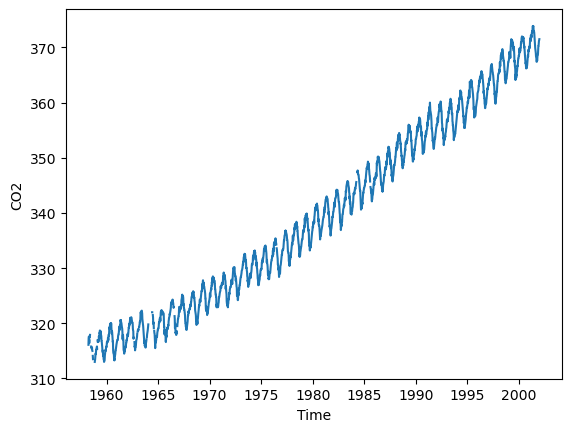

In [5]:
fig , ax = plt.subplots()
ax.plot(data['time'] , data['co2'])
ax.set_xlabel("Time")
ax.set_ylabel("CO2")
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2284 non-null   datetime64[ns]
 1   co2     2225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB


In [7]:
data.isna().sum()

time     0
co2     59
dtype: int64

In [8]:
# test_data = data.fillna(data['co2'].mean() , inplace=True)

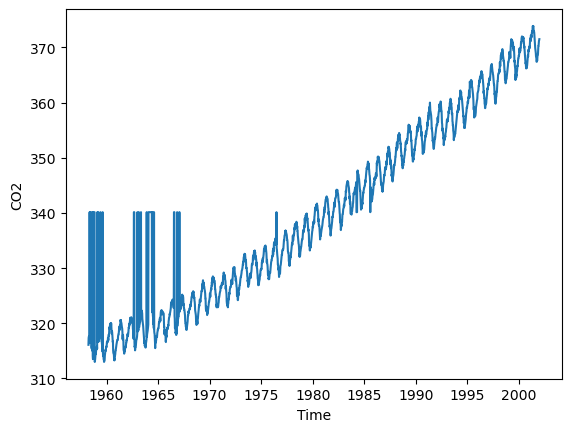

In [9]:
fig , ax = plt.subplots()
ax.plot(data['time'] , data['co2'].fillna(data['co2'].mean()))
ax.set_xlabel("Time")
ax.set_ylabel("CO2")
plt.show()

In [10]:
data['co2'] = data['co2'].interpolate()
data['co2']

0       316.1
1       317.3
2       317.6
3       317.5
4       316.4
        ...  
2279    370.3
2280    370.8
2281    371.2
2282    371.3
2283    371.5
Name: co2, Length: 2284, dtype: float64

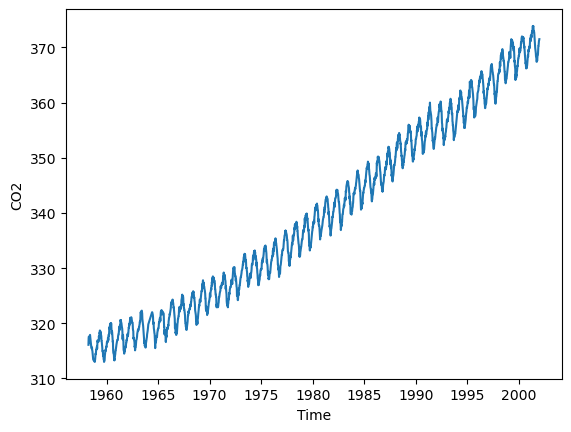

<Figure size 20000x1000 with 0 Axes>

In [ ]:
fig , ax = plt.subplots()
ax.plot(data['time'] , data['co2'])
ax.set_xlabel("Time")
ax.set_ylabel("CO2")
plt.show()

In [18]:
data.isna().sum()

time    0
co2     0
dtype: int64

Create time serires data

In [22]:
def create_time_series_data(data , window_size = 5):
    i = 1
    while i < window_size:
        data['co2_{}'.format(i)] = data['co2'].shift(-i)
        i += 1
    data['target'] = data['co2'].shift(-i)
    return data

In [23]:
data = create_time_series_data(data)

In [24]:
data

,time,co2,co2_1,co2_2,co2_3,co2_4,target
0,1958-03-29,316.1,317.3,317.6,317.5,316.4,316.90
1,1958-04-05,317.3,317.6,317.5,316.4,316.9,317.20
2,1958-04-12,317.6,317.5,316.4,316.9,317.2,317.50
3,1958-04-19,317.5,316.4,316.9,317.2,317.5,317.90
4,1958-04-26,316.4,316.9,317.2,317.5,317.9,317.55
...,...,...,...,...,...,...,...
2279,2001-12-01,370.3,370.8,371.2,371.3,371.5,NaN
2280,2001-12-08,370.8,371.2,371.3,371.5,NaN,NaN
2281,2001-12-15,371.2,371.3,371.5,NaN,NaN,NaN
2282,2001-12-22,371.3,371.5,NaN,NaN,NaN,NaN


In [28]:
data.dropna(axis = 0 , inplace=True)

Split data

In [30]:
target = 'target'
x = data.drop(['time' , 'target'] , axis=1)
y = data[target]
print(x)
print(y)

        co2  co2_1  co2_2  co2_3  co2_4
0     316.1  317.3  317.6  317.5  316.4
1     317.3  317.6  317.5  316.4  316.9
2     317.6  317.5  316.4  316.9  317.2
3     317.5  316.4  316.9  317.2  317.5
4     316.4  316.9  317.2  317.5  317.9
...     ...    ...    ...    ...    ...
2274  368.7  368.7  368.8  369.7  370.3
2275  368.7  368.8  369.7  370.3  370.3
2276  368.8  369.7  370.3  370.3  370.8
2277  369.7  370.3  370.3  370.8  371.2
2278  370.3  370.3  370.8  371.2  371.3

[2279 rows x 5 columns]
0       316.90
1       317.20
2       317.50
3       317.90
4       317.55
         ...  
2274    370.30
2275    370.80
2276    371.20
2277    371.30
2278    371.50
Name: target, Length: 2279, dtype: float64


In [46]:
train_size = 0.8
num_samples = len(x)

In [ ]:
x_train = x[:int(num_samples*train_size)]
y_train = y[:int(num_samples*train_size)]
x_test = x[int(num_samples*train_size):]
y_test = y[int(num_samples*train_size):]

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1823, 5)
(456, 5)
(1823,)
(456,)


Modeling

In [53]:
reg = Pipeline(steps=[
    ("scale" , StandardScaler()),
    ('model' , LinearRegression())
])

In [54]:
reg.fit(x_train , y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [58]:
y_pred = reg.predict(x_test)
y_pred

array([359.06750273, 358.97189003, 359.54572991, 359.99280923,
       359.797743  , 359.92631774, 360.64237742, 360.66014557,
       360.60747321, 359.82167717, 359.69227699, 359.08788369,
       358.97033498, 357.75632039, 357.66600305, 357.68462438,
       356.46289775, 356.36088586, 355.35576333, 355.49277331,
       354.70161906, 354.4785725 , 353.98872838, 352.93682679,
       353.47569425, 353.44623519, 353.77113279, 353.89861687,
       353.98063459, 354.3964302 , 354.40046725, 354.82083581,
       355.16202434, 355.72010866, 356.2271626 , 356.45339869,
       356.71323794, 357.04081081, 357.63863918, 358.31088828,
       358.41326371, 358.66762017, 358.43290601, 358.74883807,
       358.46601788, 358.64518367, 358.9724034 , 359.61354114,
       358.94751531, 359.89317842, 360.32152964, 361.01069441,
       361.0230397 , 361.17570445, 361.03958228, 361.35562123,
       362.25476153, 361.80106349, 361.64934949, 361.62524012,
       361.73544903, 361.09328097, 360.99087252, 360.64

Error

In [62]:
print("R2 Score: {}".format(r2_score(y_test , y_pred)))
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test , y_pred)))
print("mean Square Error: {}".format(mean_squared_error(y_test , y_pred)))

R2 Score: 0.9907505918201437
Mean Absolute Error: 0.3605603788359215
mean Square Error: 0.22044947360346426
